In [ ]:
!unzip '/content/drive/My Drive/19_420_bundle_archive.zip'

Archive:  /content/drive/My Drive/19_420_bundle_archive.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

In [ ]:
iris = pd.read_csv('/content/Iris.csv')

iris = iris.drop(['Id'],axis = 1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [ ]:
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


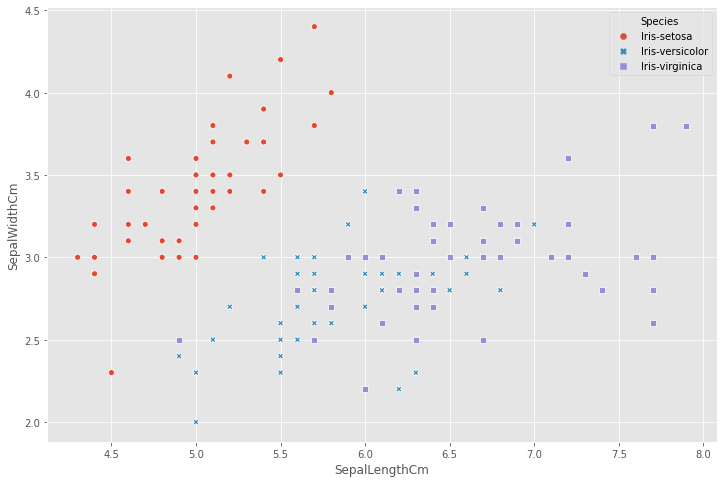

In [ ]:
sns.scatterplot(x = iris.SepalLengthCm, y = iris.SepalWidthCm, hue = iris.Species, style = iris.Species)

In [ ]:

x = iris.iloc[:, 0:4].values
y = iris.Species.values


In [ ]:
#Data standarization
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)



In [ ]:
covariance_matrix = np.cov(x.T)
print("covariance matrix: \n", covariance_matrix)

covariance matrix: 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigen values: \n", eigen_values, "\n")
print("Eigen vectors:\n", eigen_vectors)

Eigen values: 
 [2.93035378 0.92740362 0.14834223 0.02074601] 

Eigen vectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


Alternatively, Singular Value Decomposition Can be used to calculate eigen values and eigen vectors.


In [ ]:
eigen_vec_svd, s, v  = np.linalg.svd(x.T)
print (eigen_vec_svd)

[[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]


Selecting Principle Components Using the explained variance

In [ ]:
for val in eigen_values:
  print(val)

2.930353775589317
0.9274036215173419
0.14834222648163944
0.02074601399559593


In [ ]:
variance_explained = [(i/sum(eigen_values))*100 for i in eigen_values]
print(variance_explained)

[72.77045209380135, 23.03052326768065, 3.683831957627379, 0.5151926808906321]


In [ ]:
cumulative_variance_explained = np.cumsum(variance_explained)
cumulative_variance_explained

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

It means that if we add1st and 2nd feature we would be able to capture 95% of the data. similarly if we use 1st, 2nd, and 3rd feature we would be able to capture 99%of the data and so on.

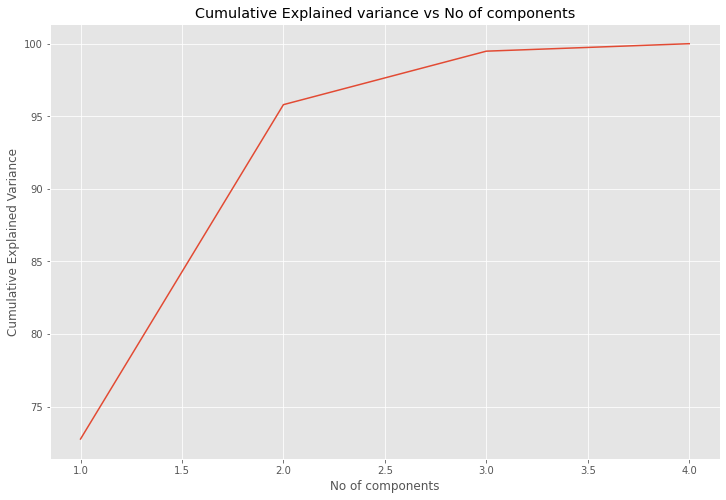

In [ ]:
sns.lineplot(x = [1,2,3,4], y = cumulative_variance_explained)
plt.xlabel("No of components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained variance vs No of components")
plt.show()

Xpca = X.W (W = projection matrix)

In [ ]:
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [ ]:
projection_matrix  = (eigen_vectors.T[:][:][:2].T)
projection_matrix

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [ ]:
x_pca = x.dot(projection_matrix)

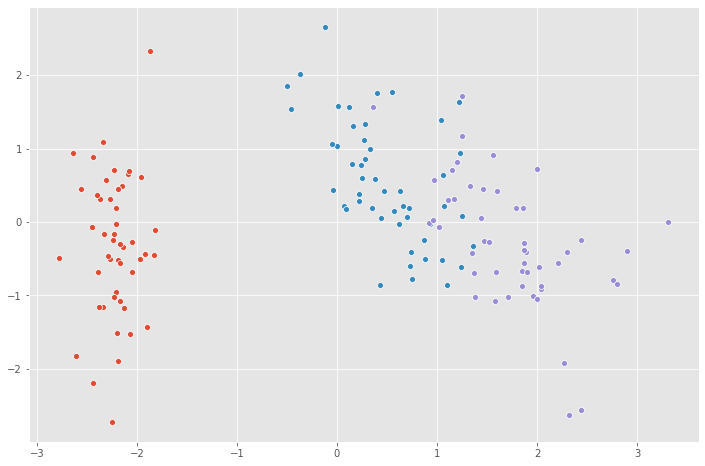

In [ ]:
for species in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
  sns.scatterplot(x_pca[y == species, 0],
                  x_pca[y == species, 1])